# Jonathan Halverson
# Monday, July 31, 2017
# Chapter 4: Regression and Prediction

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
plt.style.use('halverson')

In [61]:
df = pd.read_csv('../machine_learning/Advertising.csv', header=0)
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [62]:
df = df.drop([df.columns[0]], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [64]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## We begin by considering a single feature

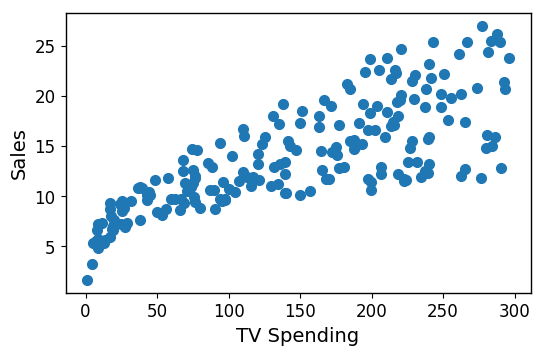

In [97]:
plt.scatter(df.TV, df.Sales)
plt.xlabel('TV Spending')
plt.ylabel('Sales')

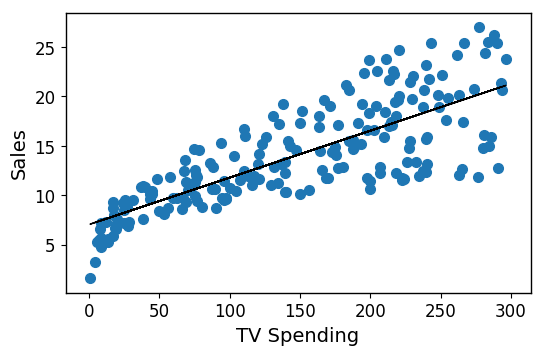

In [98]:
a, b = np.polyfit(df.TV, df.Sales, 1)
plt.plot(df.TV, a * df.TV + b, 'k-')
plt.scatter(df.TV, df.Sales)
plt.xlabel('TV Spending')
plt.ylabel('Sales')

In [67]:
a, b

(0.04753664043301975, 7.0325935491276992)

In [68]:
result.rsquared

0.61187505085007099

In [69]:
import statsmodels.api as sm

X = sm.add_constant(df.TV)
regmodel = sm.OLS(df.Sales, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           1.47e-42
Time:                        13:22:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

To apply the framework of statistical inference for the interpretation of the coefficients and their corresponding p-values, the residuals must be normally distributed. Let's check this by constructing a histogram and applying the Anderson-Darling test:

(array([  4.,  10.,  13.,  17.,  40.,  42.,  33.,  16.,  17.,   8.]),
 array([-8.38598196, -6.82614689, -5.26631183, -3.70647677, -2.14664171,
        -0.58680664,  0.97302842,  2.53286348,  4.09269854,  5.65253361,
         7.21236867]),
 <a list of 10 Patch objects>)

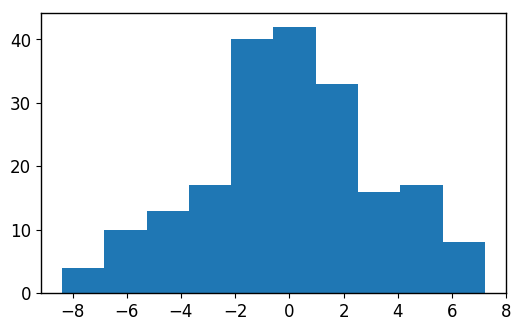

In [70]:
plt.hist(result.resid)

In [71]:
from scipy.stats import anderson

a2, crit, sig = anderson(result.resid, 'norm')
a2, crit, sig, a2 < crit[4]

(0.49121060466279687,
 array([ 0.565,  0.644,  0.772,  0.901,  1.071]),
 array([ 15. ,  10. ,   5. ,   2.5,   1. ]),
 True)

We see that the residuals are indeed consistent with a normal distribution. Below we plot them as a function of TV spending:

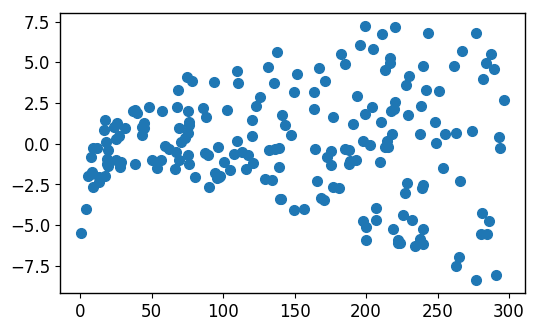

In [72]:
plt.scatter(df.TV, result.resid)

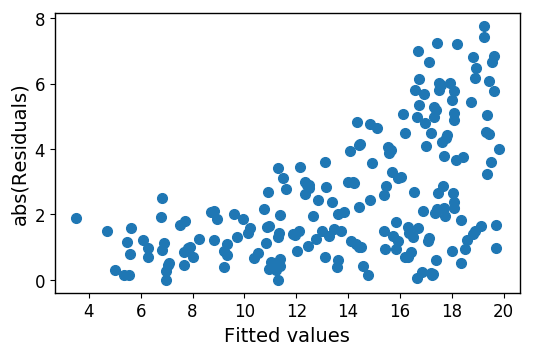

In [130]:
plt.scatter(result.fittedvalues, np.abs(result.resid))
plt.xlabel('Fitted values')
plt.ylabel('abs(Residuals)')

In [143]:
result.mse_model

3374.3467788869848

In [144]:
sum(result.resid * result.resid)

2042.8019711130144

In [133]:
result.mse_total

27.221853015075379

In [140]:
result.mse_resid

10.317181672287958

In [142]:
sum(result.resid * result.resid) / 198

10.317181672287951

Clearly the magnitude of the residuals depends on the predicted value with high Sales showing the biggest errors.

In [87]:
cmb = pd.DataFrame({'TV':df.TV, 'Sales':df.Sales, 'FittedValues':result.fittedvalues, 'Residuals':result.resid})
cmb.head(10)

,FittedValues,Residuals,Sales,TV
0,17.970775,4.129225,22.1,230.1
1,9.147974,1.252026,10.4,44.5
2,7.850224,1.449776,9.3,17.2
3,14.234395,4.265605,18.5,151.5
4,15.627218,-2.727218,12.9,180.8
5,7.446162,-0.246162,7.2,8.7
6,9.765950,2.034050,11.8,57.5
7,12.746498,0.453502,13.2,120.2
8,7.441409,-2.641409,4.8,8.6
9,16.530414,-5.930414,10.6,199.8


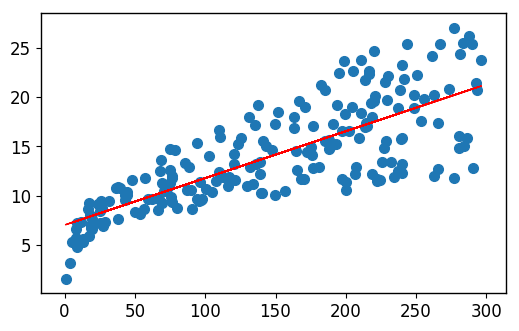

In [88]:
plt.plot(df.TV, result.fittedvalues, color='r')
plt.scatter(df.TV, df.Sales)

The plot above shows heteroskedasticity -- non-uniform variance over the range -- which is a violation of the conditions needed to apply inferential statistics. The data didn't look linear to begin with so this is not a surprise.

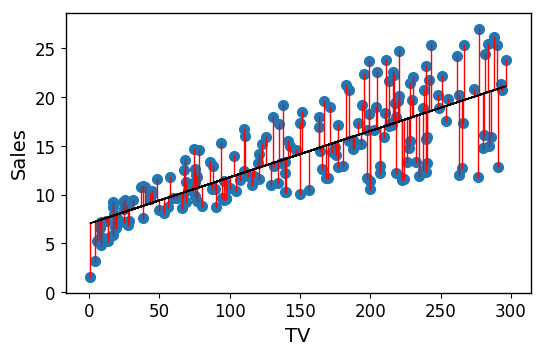

In [96]:
for x, y1, y2 in zip(df.TV, df.Sales, result.fittedvalues):
     plt.plot([x, x], [y1, y2], color='r')
plt.scatter(df.TV, df.Sales)
plt.plot(df.TV, result.fittedvalues, 'k')
plt.xlabel('TV')
plt.ylabel('Sales')

## Next we consider multiple features

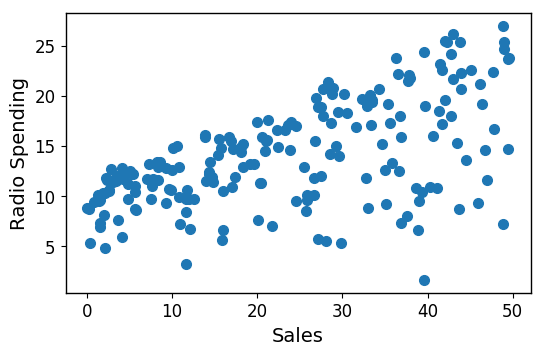

In [74]:
plt.scatter(df.Radio, df.Sales)
plt.xlabel('Sales')
plt.ylabel('Radio Spending')

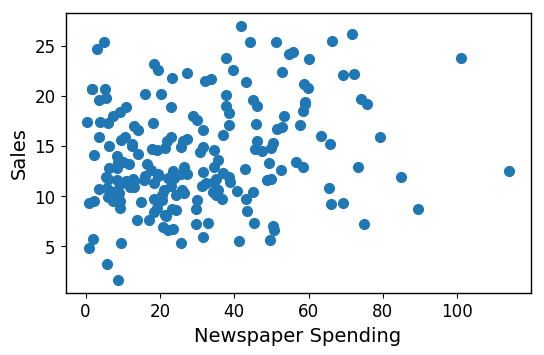

In [102]:
plt.scatter(df.Newspaper, df.Sales)
plt.xlabel('Newspaper Spending')
plt.ylabel('Sales')

Money spent on newspaper seems to be independent of sales.

In [101]:
X = np.column_stack((df.TV, df.Radio, df.Newspaper))
X = sm.add_constant(X)
regmodel = sm.OLS(df.Sales, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           1.58e-96
Time:                        14:39:56   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

It doesn't seem like statsmodels provides a way to do stepwise regression based on the AIC. However, one could implement this easily. Same with forward or backward successive selection.

When one sees spurious results such as the number of bedrooms lowering the value of a home, it may suggest that a confounding variable is missing.

It's good to remove highly correlated variables since they can confuse (in a sense) the optimizer. With RF one of features may wind up with small importance.

### Let's try an interaction

In [109]:
mf = df[['TV', 'Radio']].copy()
mf['TV_Radio'] = mf.TV * mf.Radio
mf.head()

,TV,Radio,TV_Radio
0,230.1,37.8,8697.78
1,44.5,39.3,1748.85
2,17.2,45.9,789.48
3,151.5,41.3,6256.95
4,180.8,10.8,1952.64


In [110]:
X = sm.add_constant(mf.values)
regmodel = sm.OLS(df.Sales, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Tue, 01 Aug 2017   Prob (F-statistic):          6.68e-146
Time:                        15:20:22   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          6.7502      0.248     27.233      0.0

In [117]:
c, x1, x2, x3 = result.params

(5, 25)

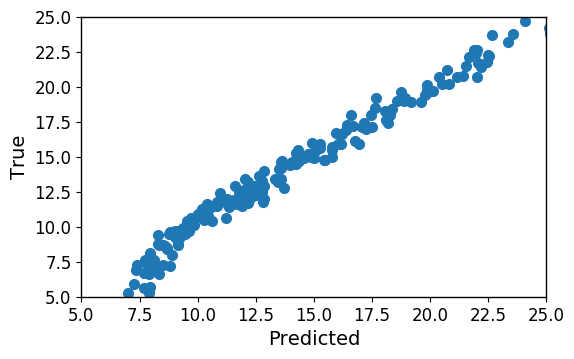

In [121]:
plt.scatter(c + mf.TV * x1 + mf.Radio * x2 + mf.TV_Radio * x3, df.Sales)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xlim(5, 25)
plt.ylim(5, 25)

### Partial residual plot

Here one is plotting TV spending versus y - (c + x1 * df.TV) + x1 * df.TV = y - c. Ideally one should get zero if the outcome is described by a linear relationship with the given feature. If the relationshp is nonlinear consider nonlinear terms.

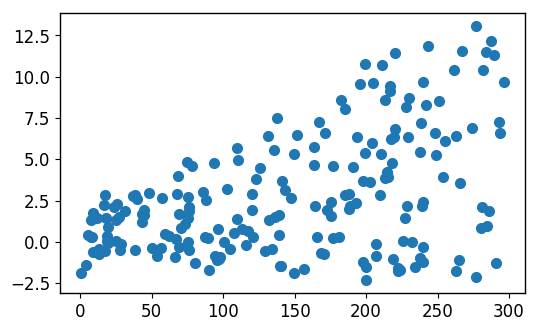

In [147]:
plt.scatter(df.TV, result.resid + x1 * df.TV)

The above figure that the relationship is mostly linear. Most striking is how the vertical spread increases in the horizontal direction (TV spending).

### Let's try a polynomial

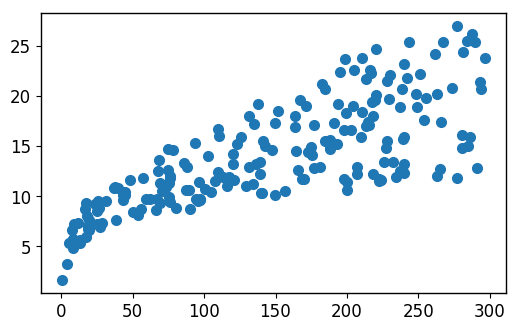

In [124]:
plt.scatter(df.TV, df.Sales)

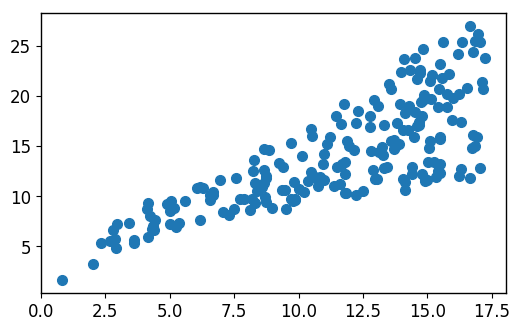

In [126]:
plt.scatter(np.sqrt(df.TV), df.Sales)

In [122]:
X = sm.add_constant(np.sqrt(df.TV))
regmodel = sm.OLS(df.Sales, X, missing='none')
result = regmodel.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     327.1
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           8.39e-44
Time:                        15:49:07   Log-Likelihood:                -516.16
No. Observations:                 200   AIC:                             1036.
Df Residuals:                     198   BIC:                             1043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.6724      0.667      4.004      0.0

We see the R-squared value is slightly better but not by much.

## Outliers and influential values

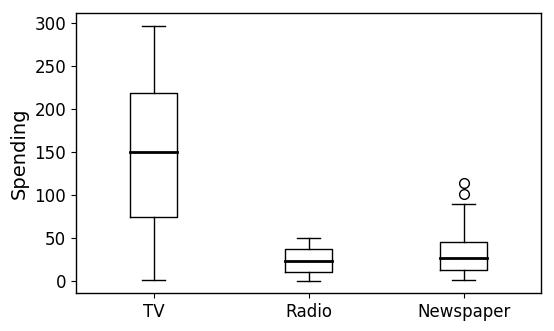

In [146]:
plt.boxplot([df.TV, df.Radio, df.Newspaper], labels=['TV', 'Radio', 'Newspaper'])
plt.ylabel('Spending')

The box plot above suggest that there may be two outliers in the newspaper feature if a very simple definition is used. Let's used more advanced metrics:

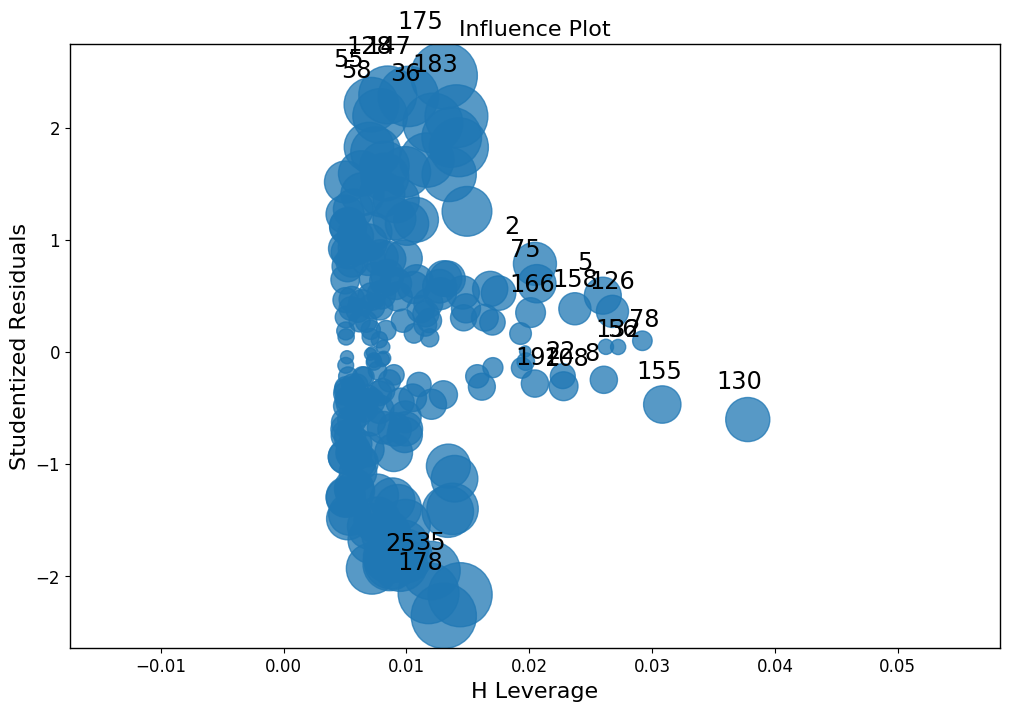

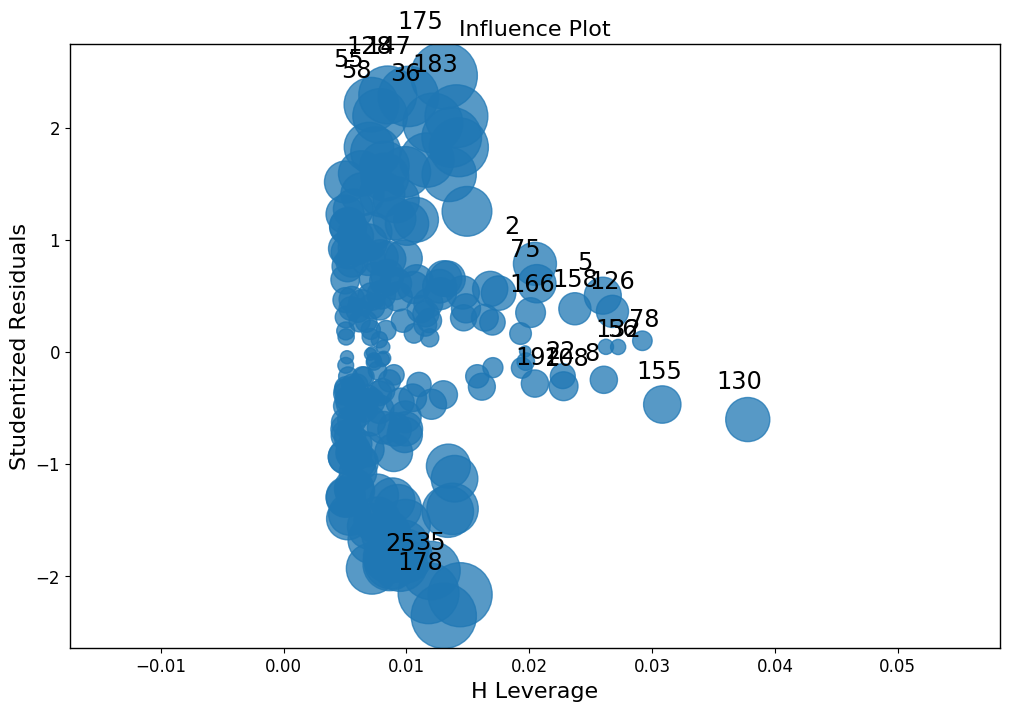

In [151]:
fig, ax = plt.subplots(figsize=(12,8))
sm.graphics.influence_plot(result, ax=ax, criterion="cooks")